In [ ]:
import MetaTrader5 as mt5
import pandas as pd
import plotly.graph_objects as go
from datetime import datetime

from IPython.display import display

In [ ]:
# connect to MetaTrader5 Terminal
mt5.initialize()

# login to your Trading Account - sign up in the description
login = 51465418
password = 'JPFfsLBB'
server = 'ICMarketsEU-Demo'

mt5.login(login, password, server)

In [ ]:
# this function retrieves olhc data from MT5 account and return a dataframe
def get_ohlc(symbol, timeframe, start_datetime, end_datetime):
    ohlc = mt5.copy_rates_range(symbol, timeframe, start_datetime, end_datetime)
    
    ohlc_df = pd.DataFrame(ohlc)
    ohlc_df['time'] = pd.to_datetime(ohlc_df['time'], unit='s')
    
    return ohlc_df[['time', 'open', 'high', 'low', 'close']]

In [ ]:
symbol = 'EURUSD'
timeframe = mt5.TIMEFRAME_M5
start_datetime = datetime(2023, 11, 1)
end_datetime = datetime(2023, 11, 5)

ohlc_df = get_ohlc(symbol, timeframe, start_datetime, end_datetime)
ohlc_df

In [ ]:
# visualizing the ohlc data
fig = go.Figure(data=[go.Candlestick(x=ohlc_df['time'],
                open=ohlc_df['open'],
                high=ohlc_df['high'],
                low=ohlc_df['low'],
                close=ohlc_df['close'])])

fig.update_layout(height=600, xaxis_rangeslider_visible=False)
fig.show()

In [ ]:
# finding hammer patterns
def find_hammer_pattern(candle):
    candle_range = candle['high'] - candle['low']
    
    # logic for bullish hammer patterns
    bull_cond1 = candle['close'] > candle['open']
    # check if the hammer pattern is contained in the upper 30% of the candle
    bull_cond2 = (candle['high'] - candle['open']) / candle_range <= 0.3 
    
    
    # logic for bearish hammer patterns
    bear_cond1 = candle['close'] < candle['open']
    # check if the hammer pattern is contained in the lower 30% of the candle
    bear_cond2 = (candle['open'] - candle['low']) / candle_range <= 0.3 

    
    if bull_cond1 and bull_cond2:
        return True
    elif bear_cond1 and bear_cond2:
        return True
    else:
        return False

ohlc_df['hammer_pattern'] = ohlc_df.apply(find_hammer_pattern, axis=1)
ohlc_df

In [ ]:
hammers = ohlc_df[ohlc_df['hammer_pattern'] == True]

fig_hammer = go.Figure(fig)
fig_hammer.update_layout(title='Hammer Candlestick Patterns')

for i, x in hammers.iterrows():
    fig_hammer.add_vline(x=x['time'], line_width=2, line_dash="dash", opacity=0.5, line_color="green")
    
fig_hammer

In [ ]:
# finding engulfing patterns
ohlc_df['previous_high'] = ohlc_df['high'].shift(1)
ohlc_df['previous_low'] = ohlc_df['low'].shift(1)

def find_engulfing_pattern(candle):
    
    bull_cond1 = candle['close'] > candle['open'] # bull candle condition
    bull_cond2 = candle['close'] > candle['previous_high'] # engulfment condition
    
    bear_cond1 = candle['close'] < candle['open'] # bear candle condition
    bear_cond2 = candle['close'] < candle['previous_low'] # engulfment condition
    
    # special condition - engulfing candle body is twice as long as previous candle range
    special_cond = abs(candle['open'] - candle['close']) / (candle['previous_high'] - candle['previous_low']) >= 2
    
    if bull_cond1 and bull_cond2 and special_cond:
        return True
    elif bear_cond1 and bear_cond2 and special_cond:
        return True
    else:
        return False

ohlc_df['engulfing_pattern'] = ohlc_df.apply(find_engulfing_pattern, axis=1)
ohlc_df

In [ ]:
engulfs = ohlc_df[ohlc_df['engulfing_pattern'] == True]

fig_engulf = go.Figure(fig)
fig_engulf.update_layout(title='Engulfing Candlestick Patterns')

for i, x in engulfs.iterrows():
    fig_engulf.add_vline(x=x['time'], line_width=2, line_dash="dash", opacity=0.5, line_color="green")
    
fig_engulf

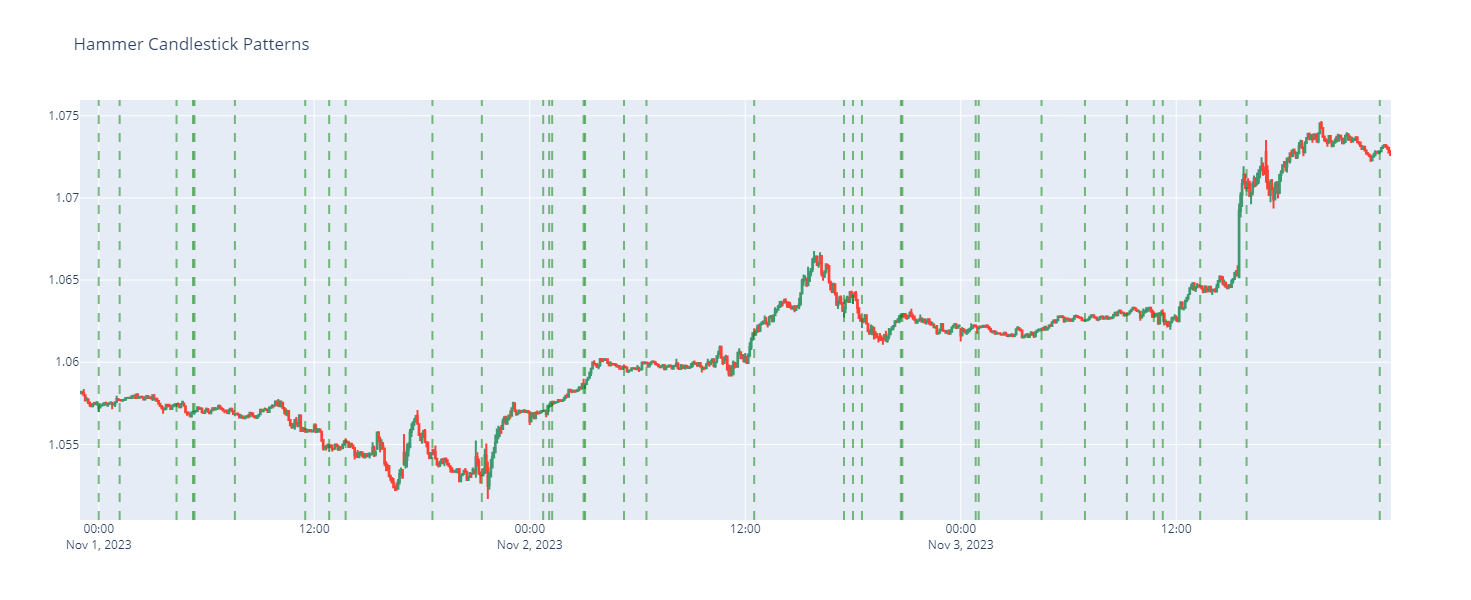

In [56]:
hammers = ohlc_df[ohlc_df['hammer_pattern'] == True]

fig_hammer = go.Figure(fig)
fig_hammer.update_layout(title='Hammer Candlestick Patterns')

for i, x in hammers.iterrows():
    fig_hammer.add_vline(x=x['time'], line_width=2, line_dash="dash", opacity=0.5, line_color="green")
    
fig_hammer

In [57]:
# finding engulfing patterns
ohlc_df['previous_high'] = ohlc_df['high'].shift(1)
ohlc_df['previous_low'] = ohlc_df['low'].shift(1)

def find_engulfing_pattern(candle):
    
    bull_cond1 = candle['close'] > candle['open'] # bull candle condition
    bull_cond2 = candle['close'] > candle['previous_high'] # engulfment condition
    
    bear_cond1 = candle['close'] < candle['open'] # bear candle condition
    bear_cond2 = candle['close'] < candle['previous_low'] # engulfment condition
    
    # special condition - engulfing candle body is twice as long as previous candle range
    special_cond = abs(candle['open'] - candle['close']) / (candle['previous_high'] - candle['previous_low']) >= 2
    
    if bull_cond1 and bull_cond2 and special_cond:
        return True
    elif bear_cond1 and bear_cond2 and special_cond:
        return True
    else:
        return False

ohlc_df['engulfing_pattern'] = ohlc_df.apply(find_engulfing_pattern, axis=1)
ohlc_df

,time,open,high,low,close,hammer_pattern,previous_high,previous_low,engulfing_pattern
0,2023-10-31 23:00:00,1.05811,1.05827,1.05806,1.05818,False,NaN,NaN,False
1,2023-10-31 23:05:00,1.05819,1.05823,1.05811,1.05812,False,1.05827,1.05806,False
2,2023-10-31 23:10:00,1.05812,1.05837,1.05800,1.05800,False,1.05823,1.05811,False
3,2023-10-31 23:15:00,1.05800,1.05801,1.05765,1.05767,False,1.05837,1.05800,False
4,2023-10-31 23:20:00,1.05769,1.05787,1.05769,1.05775,False,1.05801,1.05765,False
...,...,...,...,...,...,...,...,...,...
871,2023-11-03 23:35:00,1.07315,1.07328,1.07315,1.07320,False,1.07316,1.07302,False
872,2023-11-03 23:40:00,1.07322,1.07323,1.07304,1.07312,False,1.07328,1.07315,False
873,2023-11-03 23:45:00,1.07313,1.07313,1.07292,1.07306,False,1.07323,1.07304,False
874,2023-11-03 23:50:00,1.07304,1.07312,1.07274,1.07276,False,1.07313,1.07292,False


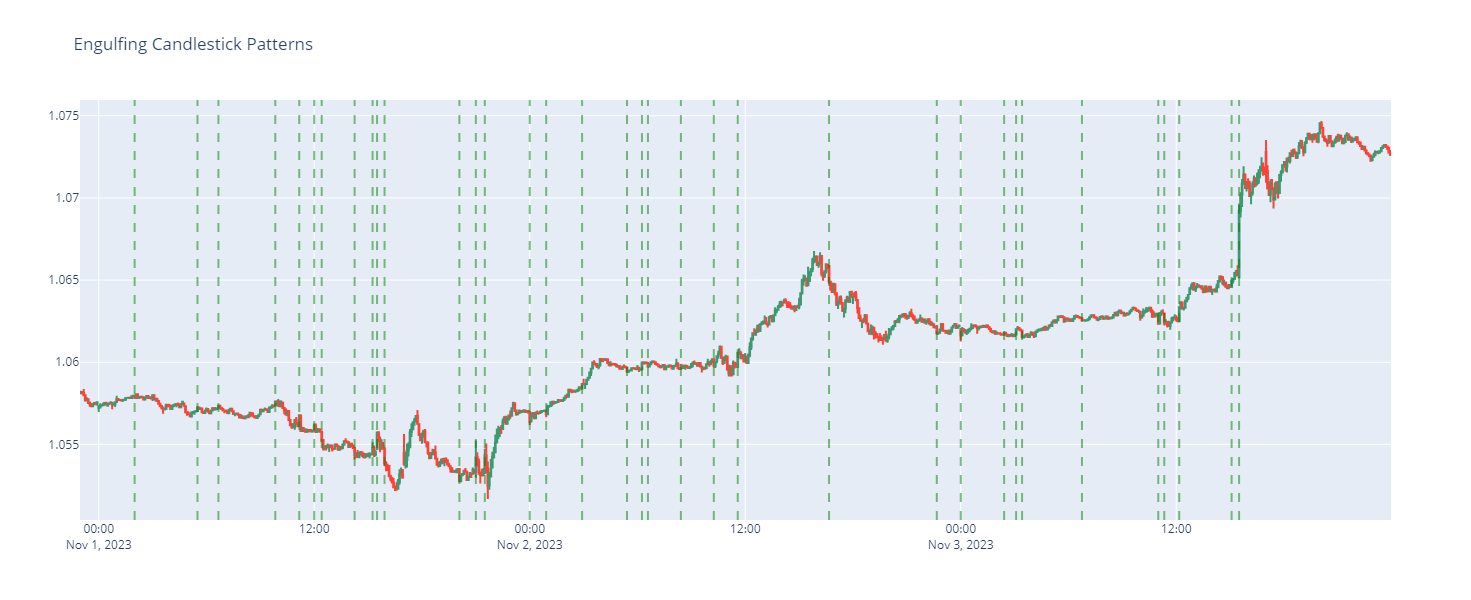

In [58]:
engulfs = ohlc_df[ohlc_df['engulfing_pattern'] == True]

fig_engulf = go.Figure(fig)
fig_engulf.update_layout(title='Engulfing Candlestick Patterns')

for i, x in engulfs.iterrows():
    fig_engulf.add_vline(x=x['time'], line_width=2, line_dash="dash", opacity=0.5, line_color="green")
    
fig_engulf